# ASPECT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
import numpy as np
import pandas as pd
df_train = pd.read_csv('/content/drive/My Drive/PENDADARAN/Training_DATA_NEWEST.csv')
target_count_aspect = df_train.labeled_Stem_Neg.value_counts()

print('Class 0:', target_count_aspect["lokasi"])
print('Class 1:', target_count_aspect["suasana"])
print('Class 2:', target_count_aspect["fasilitas"])

target_count_aspect.plot(kind='bar', title='Count (target)');

AttributeError: ignored

In [0]:
df_train_aspect = df_train.loc[df_train['labeled_Stem_Neg'].isin(["lokasi", "fasilitas", "suasana"])]

In [0]:
count_class_0_aspect, count_class_1_aspect, count_class_2_aspect = df_train_aspect.labeled_Stem_Neg.value_counts()

df_class_0_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "lokasi"]
df_class_1_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "suasana"]
df_class_2_aspect = df_train_aspect[df_train_aspect['labeled_Stem_Neg'] == "fasilitas"]

Random over-sampling:
fasilitas    10665
lokasi       10665
suasana      10665
Name: labeled_Stem_Neg, dtype: int64


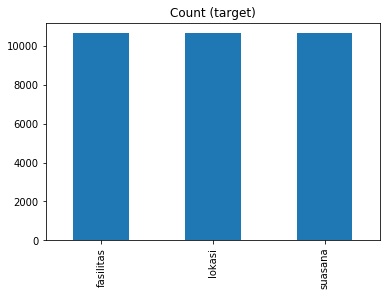

In [5]:
df_class_1_over_aspect = df_class_1_aspect.sample(count_class_0_aspect, replace=True)
df_class_2_over_aspect = df_class_2_aspect.sample(count_class_0_aspect, replace=True)
df_test_over_aspect = pd.concat([df_class_0_aspect, df_class_1_over_aspect, df_class_2_over_aspect], axis=0)

print('Random over-sampling:')
print(df_test_over_aspect.labeled_Stem_Neg.value_counts())

df_test_over_aspect.labeled_Stem_Neg.value_counts().plot(kind='bar', title='Count (target)');

In [6]:
# to be imported
from __future__ import print_function
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer

from keras.models import load_model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, LSTM, GRU
from keras.callbacks import EarlyStopping
from keras import initializers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [7]:
cols = ['labeled_Stem_Neg','Review_Stemming']
d_aspect = df_test_over_aspect[cols]

d_aspect=d_aspect[d_aspect['Review_Stemming'].notnull()]

d_aspect=d_aspect[d_aspect['labeled_Stem_Neg'].notnull()]
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

print(np.unique(y_aspect, return_counts=True))

(array(['fasilitas', 'lokasi', 'suasana'], dtype=object), array([10665, 10665, 10665]))


In [0]:
len(d_aspect)

31995

In [0]:
d_aspect.replace('', np.nan, inplace=True)
d_aspect.dropna(inplace=True)

In [0]:
d_aspect.reset_index(drop=True,inplace=True)
x_aspect = d_aspect.iloc[:, 1].values
y_aspect = d_aspect.iloc[:, 0].values

In [0]:
len(y_aspect)

31995

In [0]:
tk_aspect = Tokenizer()

In [0]:
text_aspect = d_aspect['Review_Stemming'].values
maxlen_aspect = max([len(i.split()) for i in text_aspect])

tk_aspect.fit_on_texts(text_aspect)
x_aspect = tk_aspect.texts_to_sequences(x_aspect)
x_aspect = sequence.pad_sequences(x_aspect, maxlen_aspect)
vocab_aspect = max([len(tk_aspect.word_index)]) + 1
print(x_aspect)

[[   0    0    0 ...   65  101  371]
 [   0    0    0 ...  120  250  190]
 [   0    0    0 ...   90   16  191]
 ...
 [   0    0    0 ...   13   23 4532]
 [   0    0    0 ...  166    3  165]
 [   0    0    0 ...  248  182  199]]


In [0]:
print("vocab aspect : " + str(vocab_aspect))
print("maxlen aspect: " + str(maxlen_aspect))

vocab aspect : 7343
maxlen aspect: 30


In [0]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_Y_aspect = LabelEncoder()
y_aspect = labelencoder_Y_aspect.fit_transform(y_aspect)
print(np.unique(y_aspect, return_counts=True))

(array([0, 1, 2]), array([10665, 10665, 10665]))


In [0]:
from tensorflow.keras import utils as np_utils
y_aspect = np_utils.to_categorical(y_aspect, num_classes= 3)

print(y_aspect)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
from sklearn.model_selection import train_test_split
x_train_aspect, x_test_aspect, y_train_aspect, y_test_aspect, indices_train_aspect, indices_test_aspect = train_test_split(x_aspect, y_aspect, d_aspect.index, test_size=0.33, random_state=42)

print(x_train_aspect.shape)
print(y_train_aspect.shape)
print(x_test_aspect.shape)
print(y_test_aspect.shape)
print(y_aspect)

(21436, 30)
(21436, 3)
(10559, 30)
(10559, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [0]:
len(x_aspect)

31995

In [0]:
x_train_aspect = sequence.pad_sequences(x_train_aspect, maxlen=maxlen_aspect)
x_test_aspect = sequence.pad_sequences(x_test_aspect, maxlen=maxlen_aspect)
print('x_train aspect shape:', x_train_aspect.shape)
print('x_test aspect shape:', x_test_aspect.shape)

x_train aspect shape: (21436, 30)
x_test aspect shape: (10559, 30)


In [0]:
embedding_dims = 64
filters = 200
kernel_size = 9
hidden_dims = 128
dropout = 0.5
lstm_unit = 64
gru_unit = 64

In [0]:
model_aspect = Sequential()
model_aspect.add(Embedding(vocab_aspect,
                embedding_dims,
                input_length=maxlen_aspect))
model_aspect.add(Dropout(dropout))

model_aspect.add(Conv1D(filters,
                kernel_size,
                padding='valid',
                activation='relu',
                strides=1))

model_aspect.add(GlobalMaxPooling1D())
model_aspect.add(Dense(hidden_dims))
model_aspect.add(Dropout(dropout))
model_aspect.add(Activation('relu'))
    
model_aspect.add(Dense(3))
model_aspect.add(Activation('softmax'))
    
model_aspect.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history_aspect = model_aspect.fit(x_train_aspect, y_train_aspect,
          batch_size=64,
          epochs=50,
          validation_split = 0.33,
          callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001)])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14362 samples, validate on 7074 samples
Epoch 1/50





14362/14362 [==============================] - 13s 903us/step - loss: 0.5548 - acc: 0.7472 - val_loss: 0.1673 - val_acc: 0.9385
Epoch 2/50
14362/14362 [==============================] - 12s 829us/step - loss: 0.1661 - acc: 0.9375 - val_loss: 0.1257 - val_acc: 0.9538
Epoch 3/50
14362/14362 [==============================] - 12s 824us/step - loss: 0.1159 - acc: 0.9566 - val_loss: 0.1209 - val_acc: 0.9534
Epoch 4/50
14362/14362 [==============================] - 12s 804us/step - loss: 0.0918 - acc: 0.9655 - val_loss: 0.1217 - val_acc: 0.9580
Epoch 5/50
14362/14362 [==============================] - 11s 791us/step - loss: 0.0762 - acc: 0.9717 - val_loss: 0.1135 - val_acc: 0.9594
Epoch 6/50
14362/14362 [=========

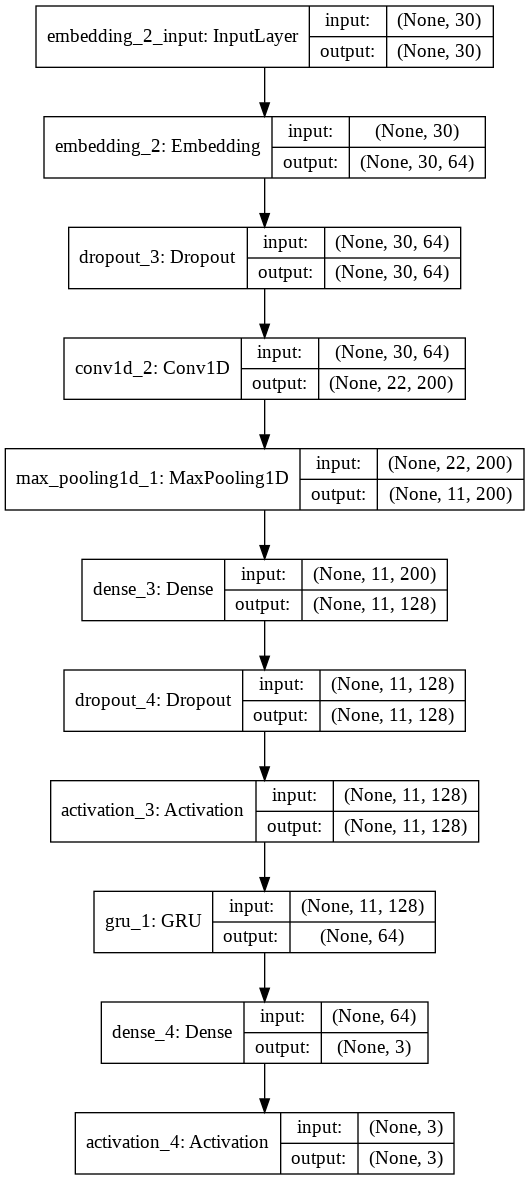

In [0]:
from keras.utils.vis_utils import plot_model

model = Sequential()
model.add(Embedding(vocab_aspect,
                    embedding_dims,
                    input_length=maxlen_aspect))
model.add(Dropout(dropout))
model.add(Conv1D(filters,
                    kernel_size,
                    padding='valid',
                    activation='relu',
                    strides=1))
model.add(MaxPooling1D())
model.add(Dense(hidden_dims)) # ini
model.add(Dropout(dropout))
model.add(Activation('relu'))

model.add(GRU(gru_unit)) 
    
model.add(Dense(3))
model.add(Activation('softmax'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Predict Aspect

In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem(list):
    tmp = []
    for val in list:
        katadasar = stemmer.stem(val)
        tmp.append(katadasar)
    return tmp

In [0]:
def ABSA_aspect(list):
    rsl = []
    spl_aspect = [val.split() for val in stem(list)]
    hasil_aspect = [ct.tag_sents([val]) for val in spl_aspect]
    hasil_aspect = [item for sublist in hasil_aspect for item in sublist]
    for val in hasil_aspect:
        tmp = ""
        for vall in val:
            if(vall[1] == "NNP" or vall[1] == "NN" or vall[1] == "VB"):
                tmp = tmp + vall[0] + " "
        tmp = tmp.split()
        tmp = ' '.join(tmp)
        k = tk_aspect.texts_to_sequences([tmp])
        k = sequence.pad_sequences(k, maxlen=maxlen_aspect)
        hsl = labelencoder_Y_aspect.inverse_transform([model_aspect.predict_classes(k)])
        rsl.append(hsl)
    return rsl

In [0]:
kal_aspect = ["sangat indah dengan menikmati pemandangan yang disuguhkan", 
       "sangat asri dan sejuk", 
       "kendaraan menuju lokasi mudah ada dari semua arah", 
       "mereka menyediakan sewa payung"]

print(ABSA_aspect(kal_aspect))

[array(['suasana'], dtype=object), array(['suasana'], dtype=object), array(['lokasi'], dtype=object), array(['fasilitas'], dtype=object)]


C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ROYAN\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

# Evaluate Aspect

In [0]:
new_review_category_aspect = model_aspect.predict_classes(x_test_aspect)

In [0]:
decode_aspect = np.argmax(y_test_aspect, axis=1)

In [0]:
decode_aspect

array([1, 1, 0, ..., 2, 2, 0])

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
lab_aspect = ["fasilitas", "lokasi", "suasana"]

In [0]:
def conf_matrix(Y_act, Y_pred, lab):
    confusion_mtx = confusion_matrix(Y_act, Y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(confusion_mtx, annot=True, fmt="d", xticklabels=lab, yticklabels=lab)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

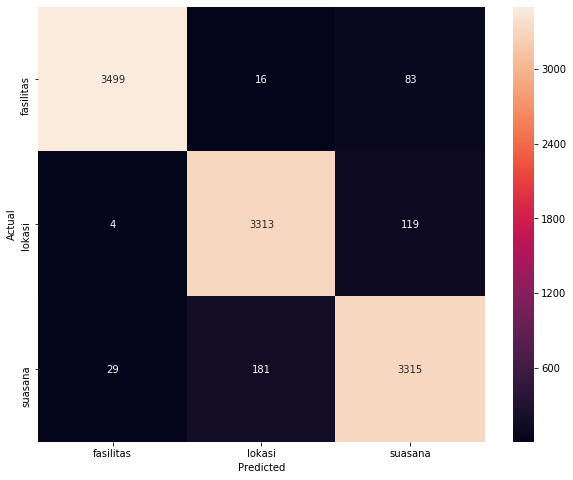

In [0]:
conf_matrix(new_review_category_aspect, decode_aspect, lab_aspect)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(new_review_category_aspect, decode_aspect)

0.9590870347570792

In [0]:
from sklearn.metrics import classification_report
print(classification_report(new_review_category_aspect, decode_aspect))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3598
           1       0.94      0.96      0.95      3436
           2       0.94      0.94      0.94      3525

    accuracy                           0.96     10559
   macro avg       0.96      0.96      0.96     10559
weighted avg       0.96      0.96      0.96     10559



In [0]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(new_review_category_aspect, decode_aspect))
print('F1 score:', f1_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Recall:', recall_score(new_review_category_aspect, decode_aspect, average='macro'))
print('Precision:', precision_score(new_review_category_aspect, decode_aspect, average='macro'))

Accuracy: 0.9590870347570792
F1 score: 0.9589702964684714
Recall: 0.9590376022541074
Precision: 0.9590320604428482


In [0]:
accr_aspect = model_aspect.evaluate(x_test_aspect,y_test_aspect)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr_aspect[0],accr_aspect[1]))

10559/10559 [==============================] - 1s 137us/step
Test set
  Loss: 0.143
  Accuracy: 0.959


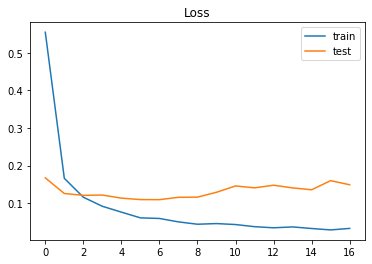

In [0]:
plt.title('Loss')
plt.plot(history_aspect.history['loss'], label='train')
plt.plot(history_aspect.history['val_loss'], label='test')
plt.legend()
plt.show();

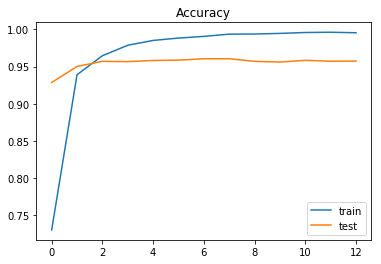

In [0]:
plt.title('Accuracy')
plt.plot(history_aspect.history['acc'], label='train')
plt.plot(history_aspect.history['val_acc'], label='test')
plt.legend()
plt.show();